Project - Investigate a Hospital dataset for patients with no shows for appointments

In [29]:
# import all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [30]:
# load the csv file and see the first few rows of data
df_hospital = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_hospital.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [31]:
# see the dimensions of the dataframe
df_hospital.shape

(110527, 14)

This shows that there are total number of 110527 patients, with 14 columns of data.

In [32]:
# display the concise summary of the dataframe
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [33]:
# calculate if any null data is present
df_hospital.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null data in the dataset.

In [34]:
# calculate if any data is present in duplicates
df_hospital.duplicated().sum()

0

There are no duplicated data.

In [35]:
# calculate the descriptive statistics for every column of the dataframe
df_hospital.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


These are the summary statistics of the data.

In [36]:
# calculate if any null data is present
df_hospital.isnull().sum().any()

False

There are no null data in the entire dataset.

Cleaning the Data

In [37]:
# rename all the columns in lower case characters and replace the "-" (hyphen) with "_" (underscore)
df_hospital.rename(columns = lambda x: x.strip().lower(). replace("-", "_"), inplace=True)
df_hospital.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


All the column labels have been changed to lower case alphabets, and no-show has been changed to no_show for consistency with the other column labels.

In [38]:
# correct spelling errors by renaming column names to the correct terms
df_hospital.rename(columns={'hipertension':'hypertension'}, inplace=True)
df_hospital.rename(columns={'handcap':'handicap'}, inplace=True)
df_hospital.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Spelling errors for hypertension and handicap have been corrected.

In [39]:
# drop columns which will not be used in analysis
df_hospital.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df_hospital.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


PatientID and Appointment ID columns were dropped as they would not be used in the exploratory phase.

In [40]:
# replace 'No' and 'Yes' in the no-show column with boolean values
df_hospital['no_show'].replace({'No':0,'Yes':1},inplace=True)

The no_show column has been converted to include 0's and 1's. no_show = 'No' is equivalent to 0, and no_show = 'Yes' is equivalent to 1.

In [41]:
df_hospital.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [42]:
# calculate the missed appointment dataframe
missed_appt = df_hospital.no_show == True

The above code calculates the number of missed appointments (i.e which are a no show = 'Yes')

Questions for analysis - What are the factors affecting no show for appointments in patients? 
Question 1 : Does sms notifications to patients prior to the appointment have any improvement in the no shows?
Question 2: Do no shows vary by gender?
Question 3: Do certain neighbourhoods have a higher rate of no shows?
Question 4: Does being an alcoholic have an effect on not turning up for the appointment; and if that is the case does it vary with gender?

Data Exploration

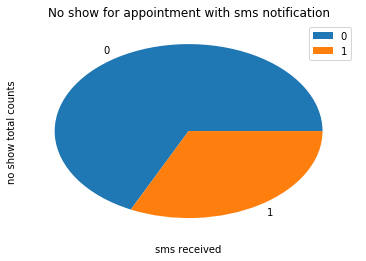

In [43]:
# visualize mean of no shows with respect to sms received
sms_noshow = df_hospital.groupby('sms_received').no_show.count()
sms_noshow.plot(kind='pie', title = 'No show for appointment with sms notification')
plt.xlabel('sms received')
plt.ylabel('no show total counts')
plt.legend();

The above pie chart shows the relationship between the sms notification with the no show for appointment. It can be inferred that the count of the no shows for appointments is slightly higher in cases where an sms reminder for the appointment was sent (referrring to 1 in the plot). Therefore sending an sms as a reminder for the appointment did not have any improvement for turning up for the appointment.

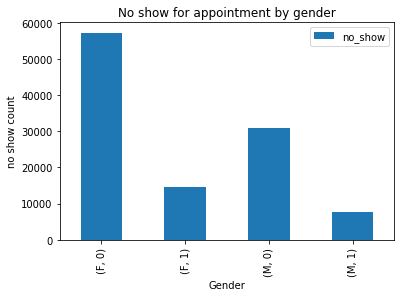

In [44]:
# visualize count of no shows with respect to gender
gender_noshow = df_hospital.groupby('gender')['no_show'].value_counts()
gender_noshow.plot(kind = 'bar', title = 'No show for appointment by gender')
plt.xlabel('Gender')
plt.ylabel('no show count')
plt.legend();


The above bar plot shows the relationship between no show for appointment count by gender distribution. It can be seen that females with no shows for appointments is higher than males with no shows. Overall both the genders turned up for their appointments more than the ones which did not.

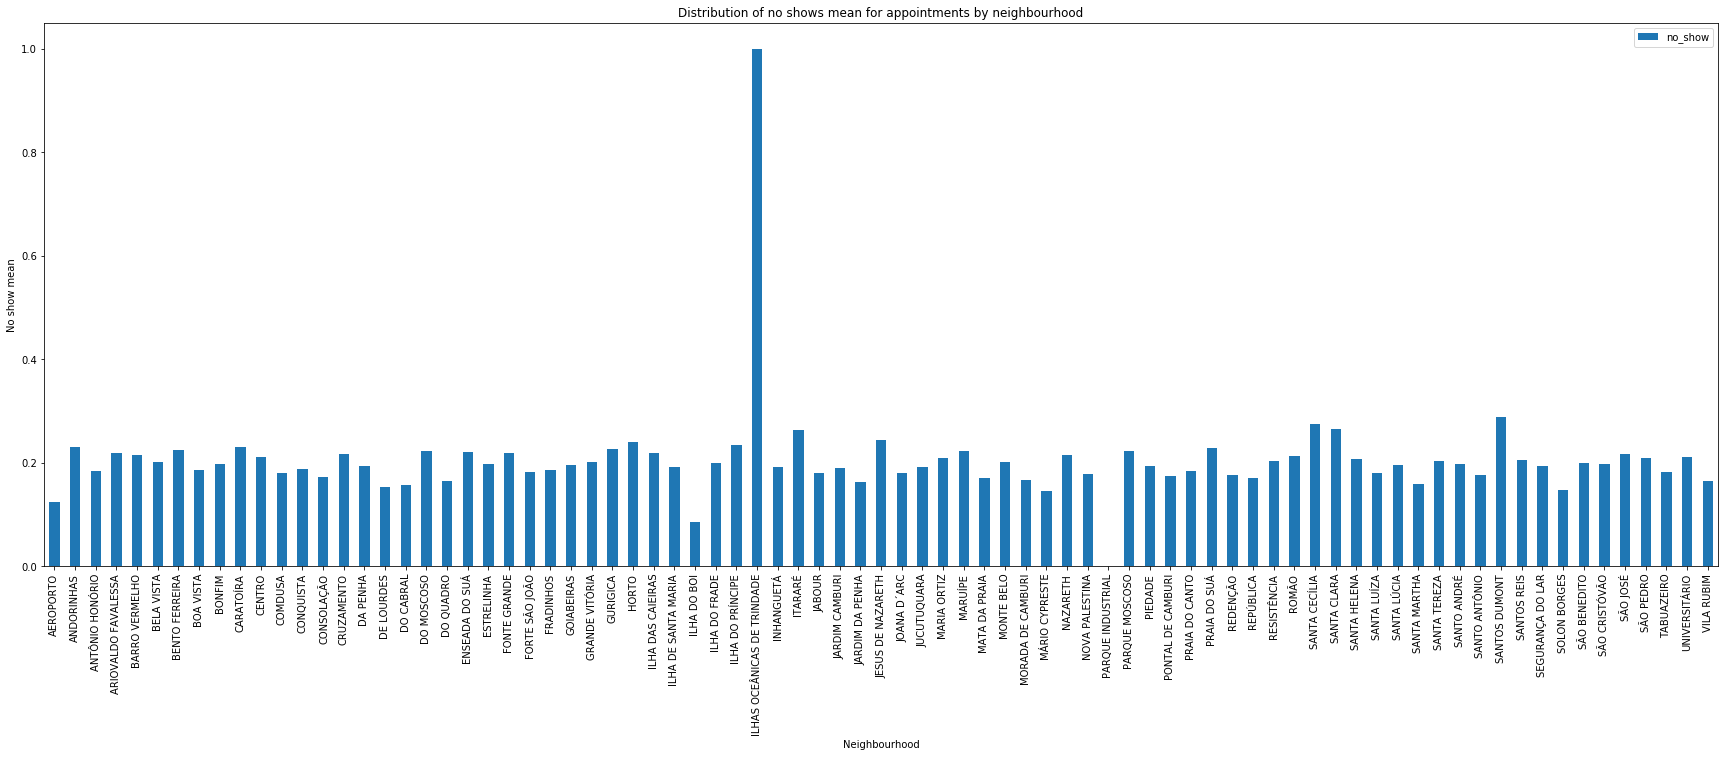

In [45]:
# visualize mean of no shows with respect to group by neighbourhood
neighbourhood_noshow = df_hospital.groupby('neighbourhood')['no_show'].mean()
neighbourhood_noshow.plot(kind='bar', title = 'Distribution of no shows mean for appointments by neighbourhood', figsize=(30,10))
plt.xlabel('Neighbourhood')
plt.ylabel('No show mean')
plt.legend();

The above bar chart shows the no shows mean distribution with respect to neighbourhood. Practically all the neighbourhoods had patients not showing up for appointments. The neighbourhood of Lhas Oceanicas De Trindade had the highest number of patients not showing up for appointments.

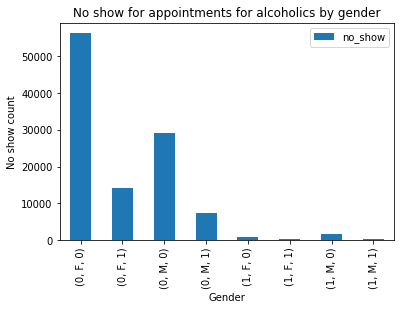

In [46]:
# visualize counts of no shows grouped by alcoholism factor and gender
alcohol_noshow = df_hospital.groupby(['alcoholism', 'gender'])['no_show'].value_counts()
alcohol_noshow.plot(kind='bar', title = 'No show for appointments for alcoholics by gender')
plt.xlabel('Gender')
plt.ylabel('No show count')
plt.legend();

The above bar plot shows the relationship between alcoholism and not showing up for the appointment distributed between the genders. It can be seen that being an alcoholic does not have an adverse effect on not turning up for the appointment. Instead both non alcoholic males and females had a higher count of not showing up for the appointment than their alcoholic counterparts. Also the number of people who showed up was higher for non-alcoholic females than for non-alcohilic males.

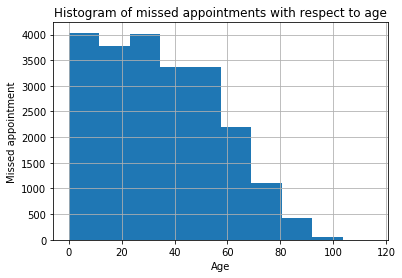

In [47]:
# visualize missed appointment with respect to age
df_hospital.age[missed_appt].hist()
plt.xlabel('Age')
plt.ylabel('Missed appointment')
plt.title("Histogram of missed appointments with respect to age")
plt.legend();

The above histogram shows the age distribution with the missed appointments. The plot shows a wide range of ages which had a missed appointment, ranging from anywhere to new born to 60 years. Older age patients had a lesser chance of missing their appointments.

Final Conclusions:
    SMS notifications did not improve the rate of not missing the appointment.
    No shows for females were higher than males.
    Alcoholism did not have any effect on missing appointment. In fact, more non-alcoholics missed their appointment than the alcoholics.
    Older patients had a lesser chance of missing their appointments.
    The neighbourhood of Lhas Oceanicas De Trindade had the highest number of patients missing their appointment.
    There could be some limitations in the analysis as there could be some data which are outliers.

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0